In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
#read csv prepare data set

#User 
dataset_source = 'matched_excel/sum1-9.csv'
test_source = 'matched_excel/walkR10.csv'
#User end

dataset_df = pd.read_csv(dataset_source,sep = ',',engine='python')
test_df = pd.read_csv(dataset_source,sep = ',',engine='python')

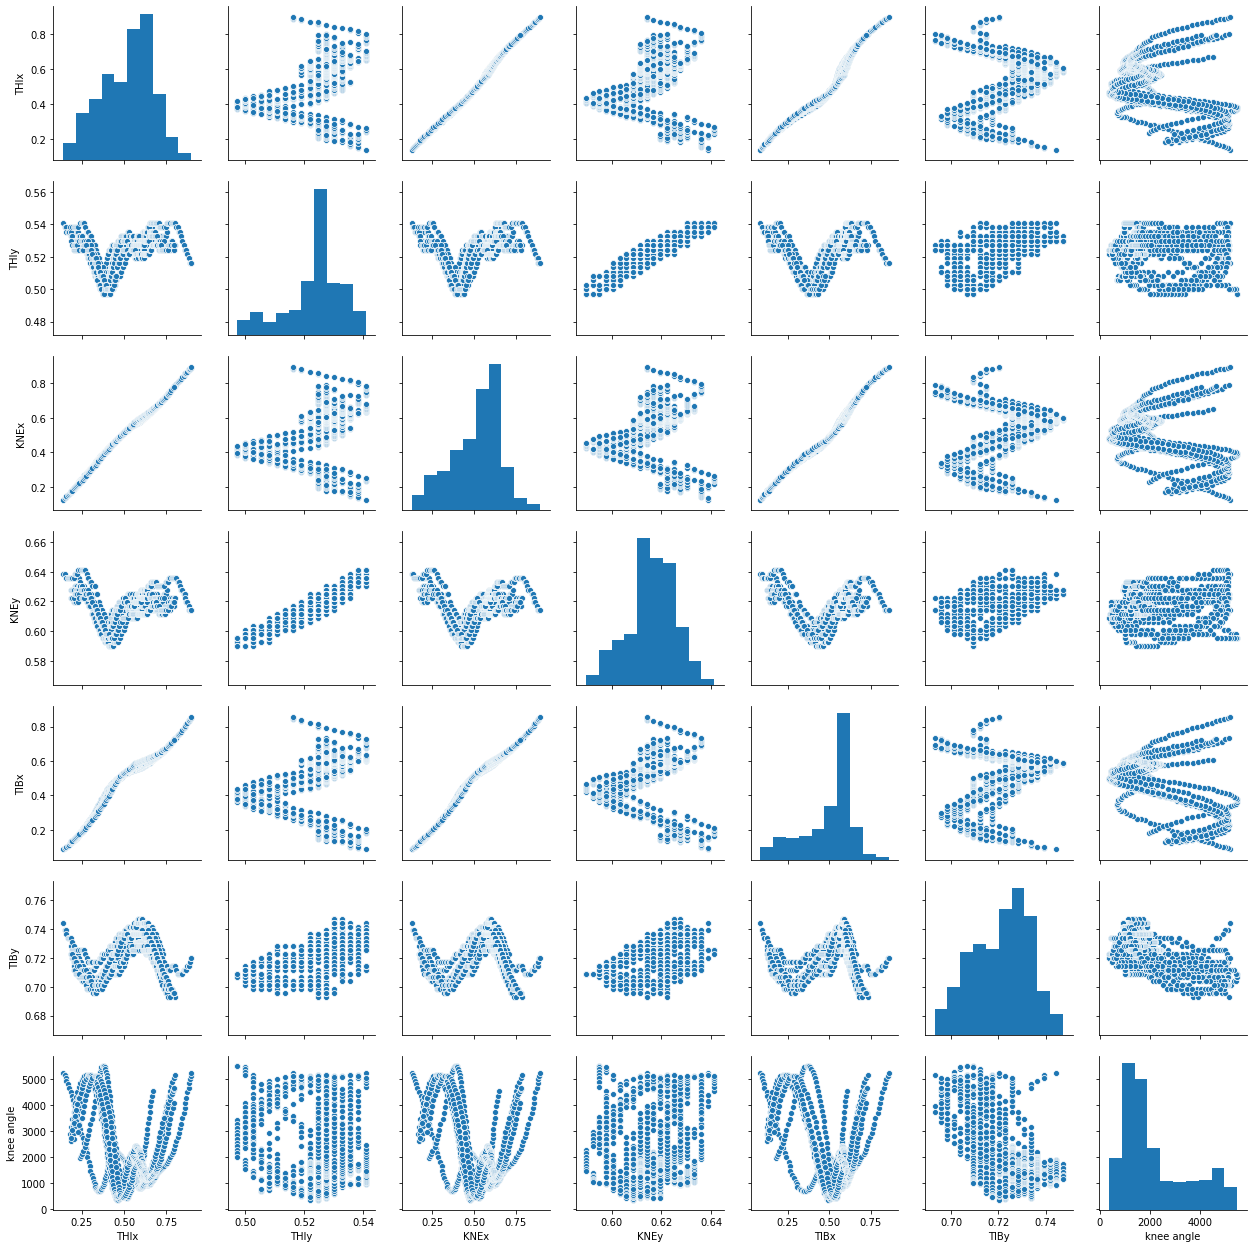

In [4]:
#plot pair
sns.pairplot(dataset_df)
fig = plt.gcf()
fig.patch.set_color('white')

In [14]:
#set intersting feature
features = [
    
#User
    'THIx',
    'THIy',
     'KNEx',
    'KNEy',
     'TIBx',
    'TIBy',
#User end
    
]
#set train data and test data
#X is an input
#y is a target
X_train,y_train = dataset_df[features], dataset_df['knee angle']
X_test, y_test = test_df[features], test_df['knee angle']

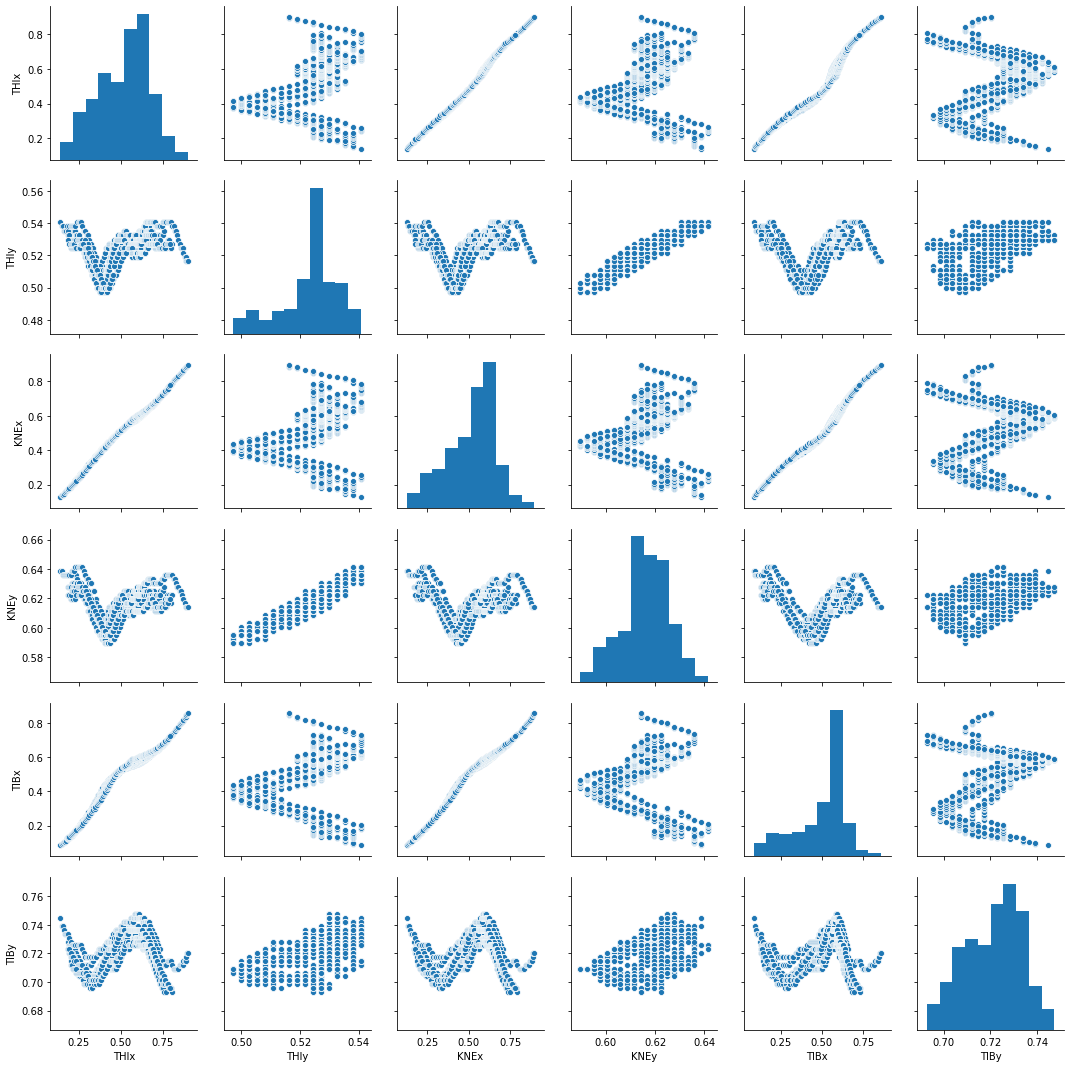

In [6]:
sns.pairplot(X_test)

In [7]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
steps = [
    ('scale', MinMaxScaler()),
#     ('pca', PCA(n_components=3)),
#    ('predictor', RidgeCV(alphas=np.logspace(-6, 6, 13))),
    ('predictor', SVR(kernel='linear', C=1e9, gamma='auto')),
#    ('predictor',GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')),
]

#initial our model
model = Pipeline(steps)
#start triaining to fit the model
model.fit(X_train, y_train)

#predict X_test
y_test_pred = model.predict(X_test)/100 - 10
#find root mean square error from the predicted value and exact value
rmse = np.mean((y_test_pred - (y_test/100 - 10))**2) ** 0.5
rmse

7.572404546346003

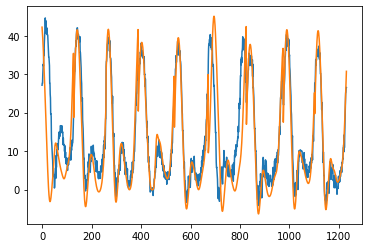

In [21]:
#plot graph compare pedict and exact
#predict (blue)
plt.plot(y_test_pred)
#exact (orange)
plt.plot(y_test/100-10)

In [71]:
#this cell export model

#User
filename = 'finalized_model.sav' #<--Dont forget to add .sav นะจ๊ะ
#User end

pickle.dump(model, open(filename, 'wb'))

In [9]:
#this cell read exported model

#User
filename = 'finalized_model.sav'
#User end


loaded_model = pickle.load(open(filename, 'rb'))
#use scikit learn score method to score the model (this mean we can read our exported model and do some predeiction with it)
result = loaded_model.score(X_test, y_test)
print(result)

0.680096008700869
